## Load packages and data

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gensim
import gensim
from gensim.corpora import Dictionary
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Scipy
import scipy.sparse as sp
from scipy.sparse import csr_matrix


# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Visualization
import pyLDAvis
import pyLDAvis.sklearn

In [2]:
# 讀入document-term dataframe
res = pd.read_csv("/Users/deankuo/Desktop/python/dissertation_replicate/Catalinac_TDM_new.csv", encoding="UTF-8")
# remove the first column 'Term' from the data frame
res2 = res.iloc[:, 1:].values

# set row names as the values of the first column
row_names = res.iloc[:, 0].values
res2 = pd.DataFrame(res2, index=row_names) # type: ignore
res2 = res2.transpose()
res2

政治  日本  社会  実現  改革  国民  教育  企業  年金  ひと  ...  都会  度目  党員  灯  難問  爆発  本質  \
0      1   1   1   0   2   0   0   2   0   0  ...   0   0   0  0   0   0   0   
1      3   0   2   3   0   0   4   1   0   1  ...   0   0   0  0   0   0   0   
2     16   0   3   2   0   4   2   0   0   1  ...   0   0   0  0   0   0   0   
3      0   0   2   0   2   4   1   1   0   0  ...   0   0   0  0   0   0   0   
4      1   5   0   2   0   5   1   2   0   2  ...   0   0   0  0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  .. ..  ..  ..  ..   
7492   3   1   0   1   0   0   0   0   0   0  ...   0   0   0  0   0   0   0   
7493   0   3   0   0   1   0   7   1   3   1  ...   0   0   0  0   0   0   0   
7494   0   1   1   2   0   1   1   0   3   2  ...   0   0   0  0   0   0   0   
7495   0   0   0   2   2   0   0   0   1   1  ...   0   0   0  0   0   0   0   
7496   0   1   1   2   0   1   1   0   3   2  ...   0   0   0  0   0   0   0   

      無法  夜明け  郎  
0      0    0  0  
1      0    0  0  
2      0    0  0  
3      0    0  0  
4      0    0  0  
...   ..  ... ..  
7492   0    0  0  
7493   0    0  0  
7494   0    0  0  
7495   0    0  0  
7496   0    0  0  

[7497 rows x 2833 columns]

## Transfer to applicable data type (sparse matrix)

In [3]:
def create_bow_from_sparse_df(df):
    bow = []
    for i in range(df.shape[0]):
        doc_words = ''
        for j, val in zip(df.columns, df.iloc[i]):
            if val > 0:
                doc_words += (j + ' ') * val
        bow.append(doc_words)
    return bow

df_bow = create_bow_from_sparse_df(res2)
print(df_bow[0]) # 1986 愛知県第１区 田辺広雄 Manifesto

政治 日本 社会 改革 改革 企業 企業 経済 経済 目指す 地域 充実 平和 支援 安心 中小 中小 政策 作り 子供 推進 保障 世界 高齢 整備 確立 産業 地方 豊か 問題 国際 国際 国際 安全 振興 働く 道路 議員 活性 行政 行政 中心 外交 確保 減税 建設 まち まち まち 国政 年間 年間 文化 文化 文化 努力 努力 努力 努力 交通 育てる 育てる 育てる 都市 解決 経験 希望 基盤 住む 住む 住む 住む 住む 住む 持てる 年寄り 地元 生きる 網 網 地場 経営 東京 役割 明るい 生きがい 生きがい 公平 果たす 力強い 立候補 明日 青少年 スポーツ 圏 圏 圏 圏 誇り 情熱 交流 展望 センター 備える 早急 愛する 会議 十分 通じる 広い 大阪 楽しい 役に立つ のびのび 中核 独自 中部 中部 中部 喜び パイプ役 捧げる 空 携わる 併せる グループ お世話 その間 好き 造り 昨今 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 名古屋 意義 日頃 


In [4]:
vectorizer = CountVectorizer(analyzer='word')
data_vectorized = vectorizer.fit_transform(df_bow)

In [5]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=69,           # Number of topics
                                      max_iter=12,               # Max learning iterations
                                      learning_method='batch',   
                                      random_state=101,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      learning_decay=0.1,
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_model.fit(data_vectorized)


LatentDirichletAllocation(learning_decay=0.1, max_iter=12, n_components=69,
                          n_jobs=-1, random_state=101)

In [6]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -7956718.53911258
Perplexity:  652.3759530466165
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.1,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 12,
 'mean_change_tol': 0.001,
 'n_components': 69,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 101,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [7]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(data_vectorized) # type: ignore
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)] # type: ignore
# index names
docnames = [name for name in res.columns[1:]]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames) # type: ignore
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .5 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_document_topics

In [8]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution
# [1, 10, 17, 18, 20, 24, 26, 29, 33, 34, 37, 38, 44, 45, 57, 60, 63, 64]

Topic Num  Num Documents
0          25            493
1          32            443
2          14            346
3           2            316
4          51            311
..        ...            ...
64          6              3
65         24              3
66         57              2
67         12              2
68         33              2

[69 rows x 2 columns]

In [9]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_) # type: ignore

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head(10)

com       fta        gdp        it       jcp        jr  \
Topic0  16.709933  0.014493   0.014493  0.014493  0.014493  0.014493   
Topic1   1.098067  0.014493   0.014493  5.056070  0.014493  0.014493   
Topic2   0.014493  0.014493  11.923505  0.014493  0.014493  0.014493   
Topic3   0.014493  0.014493   5.231945  0.014493  0.014493  0.014493   
Topic4  11.228403  0.014493   0.014493  0.014493  0.014493  0.014493   
Topic5   0.014493  0.014493   7.887147  0.014493  0.014493  0.696083   
Topic6   0.014493  0.014493   0.014493  0.014493  0.014493  0.014493   
Topic7   0.014493  0.014493   1.745909  0.014493  0.014493  0.014493   
Topic8   0.014493  0.014493   0.014493  0.014493  0.014493  0.014493   
Topic9   0.014493  0.014493   0.014493  0.014493  0.014493  0.014493   

              npo        oda       pko          up  ...        高等        高級  \
Topic0   3.735113   1.336788  0.014493    0.014493  ...  0.014493  0.014493   
Topic1   0.014493   0.014493  0.014493    0.014493  ...  0.014493  0.014493   
Topic2   0.014493   0.014493  0.014493    0.014493  ...  0.014493  0.014493   
Topic3   0.014493   0.014493  0.014493    0.014493  ...  0.014493  0.014493   
Topic4  41.893448   0.014493  0.014493    0.033186  ...  0.014493  2.941748   
Topic5   0.014493   0.014493  0.014493    1.260113  ...  0.014493  0.014493   
Topic6   2.744925   0.014493  0.014493    0.014493  ...  0.014493  0.014493   
Topic7  12.444935  16.772021  0.014493    0.014502  ...  0.014493  0.041338   
Topic8   0.345260   0.014493  0.014493  119.447786  ...  0.014493  0.014493   
Topic9   0.014493   0.014493  0.014493    0.014493  ...  0.014493  0.014493   

              高速        高額         高騰          高齢        魅力        鳩山  \
Topic0  0.025927  0.014493   0.490083    8.391422  0.014493  0.014493   
Topic1  0.014493  0.014493   0.014493    0.014493  0.014493  0.014493   
Topic2  3.164541  0.014493   0.728605  262.907431  6.384886  0.014493   
Topic3  0.014493  0.014493   0.014503    1.576030  0.014493  0.014493   
Topic4  0.014493  0.014493   0.014493    2.261036  6.353199  0.014493   
Topic5  1.835280  0.014493  24.157804   49.876561  0.014493  0.014493   
Topic6  0.014493  0.014493   0.014493    2.780157  0.014493  0.014493   
Topic7  1.153770  0.014493   0.014493  161.286029  0.120986  0.014493   
Topic8  0.014493  0.014493   0.014493   57.239723  0.014493  0.014493   
Topic9  0.014493  0.014493   0.014493    5.657856  0.014493  0.014493   

             鹿児島         黒字  
Topic0  0.014493   5.149576  
Topic1  0.014493  12.838497  
Topic2  0.014493   0.287074  
Topic3  0.014493   0.014493  
Topic4  0.014493   0.014493  
Topic5  0.014493   0.014493  
Topic6  2.048799   0.014493  
Topic7  0.014493   0.135549  
Topic8  0.014493   0.014493  
Topic9  0.014493   0.014493  

[10 rows x 2649 columns]

In [10]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_keywords=15):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_keywords]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

# Topic - Keywords Dataframe
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_keywords=15)
df_topic_keywords = pd.DataFrame(topic_keywords).transpose()
df_topic_keywords.index = ['Word ' + str(i) for i in range(df_topic_keywords.shape[0])]  # type: ignore
df_topic_keywords.columns = ['Topic ' + str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords

Topic 0 Topic 1 Topic 2 Topic 3 Topic 4 Topic 5 Topic 6 Topic 7  \
Word 0       年金      平成      政治      平和      議員      政治      新人      必要   
Word 1       政権      年度      社会      基地      国会      消費      新風      経済   
Word 2       農業      愛知      世界      反対      法案      廃止     流れる      改革   
Word 3       日本      栃木      日本      憲法      委員     自民党     お世話      日本   
Word 4       制度      政府      経済      消費      ひと      国民      作る      国民   
Word 5       交代      万博      平和     社会党     衆議院      自由      海外      政策   
Word 6       地方      少年      国民      政治      政治      日本      訪問      問題   
Word 7       地域      日本      国際      守る      立法      コメ      女性      財政   
Word 8       外交      福祉      自由     目指す      政策      輸入      公共      景気   
Word 9       直接      事業      改革      軍事      当選      農業      密着      制度   
Word 10      税金      継続     我が国      差別      活動      守る     目指す      行政   
Word 11      改革      健康      豊か      人権      選挙      実現      協力      選挙   
Word 12      予算      赤字      安定      条約      成立      金権      交通      社会   
Word 13      安全     新しい      発展      安保      提出      選挙      卒業      ひと   
Word 14      無駄      子供      時代      軍縮      問題      企業      年金      対策   

        Topic 8 Topic 9  ... Topic 59 Topic 60 Topic 61 Topic 62 Topic 63  \
Word 0       消費      増税  ...       政治       技術       市民       改革       沖縄   
Word 1       改革      守る  ...       減税       科学       政治       日本       基地   
Word 2       国民      反対  ...       教育       未来       社会       教育       振興   
Word 3       税率      政治  ...       国民       佐賀       官僚       社会       神戸   
Word 4       政治      憲法  ...       拡大       広島       行政       経済       返還   
Word 5       行政      庶民  ...       大型       社会       情報       回復       県民   
Word 6       反対      国民  ...       間接       子供       主役       景気       医療   
Word 7       up      改悪  ...       企業       日本      民主党       推進       離島   
Word 8       増税      日本  ...       不況      愛する       福祉      目指す       実現   
Word 9     引き上げ      野党  ...       内需       教育      目指す       高齢       利用   
Word 10      税金     自民党  ...      中曽根       整備       参加       対策       全力   
Word 11      緩和      医療  ...       中小       工業       公開     取り組む       福祉   
Word 12     新進党      確か  ...       対策       東部       改革       環境       産業   
Word 13      規制      保障  ...       福祉       福祉       中心       作り       問題   
Word 14      福祉     暮らし  ...       政策       立国       実現       構造       縮小   

        Topic 64 Topic 65 Topic 66 Topic 67 Topic 68  
Word 0        施設       地方       環境       増税       対策  
Word 1        熊本       分権       地球       憲法       拡大  
Word 2      サービス       日本       自然      自民党       図る  
Word 3        もの       改革       保全       日本       中小  
Word 4        介護       地域      目指す       民営       実現  
Word 5        在宅       中央       作り       守る     つとめる  
Word 6        充実       再生      美しい       郵政       景気  
Word 7        保育       財政       豊か       消費       推進  
Word 8        教育       自治       破壊      共産党       減税  
Word 9       ホーム       経済       実現       戦争       緊急  
Word 10       負担       秋田       社会      民主党       教育  
Word 11       軽減       時代       多摩       改悪       企業  
Word 12       廃棄       集権       守る       反対       公共  
Word 13       老人       主権    エネルギー       郵便       事業  
Word 14       保険       社会       生活       庶民       支援  

[15 rows x 69 columns]

In [33]:
# 定義要標記的數字
pork_topics = [1, 10, 17, 18, 20, 24, 26, 29, 33, 34, 37, 38, 44, 45, 57, 60, 63, 64]
#[1, 10, 16, 17, 18, 19, 20, 23, 24, 26, 29, 33, 34, 37, 38, 39, 44, 45, 52, 57, 58, 60, 63, 64]

# 定義處理函數
def label_topic(topic):
    if topic in pork_topics:
        return 1
    else:
        return 0

# 將處理函數應用到 'dominant_topic' 欄位，得到新的 'is_target_topic' 欄位
df_document_topic['PORK'] = df_document_topic['dominant_topic'].apply(lambda x: label_topic(x))
df_document_topic.head()

Topic0  Topic1  Topic2  Topic3  Topic4  \
X1986.1.愛知県第１区ﾀﾅﾍﾞﾋﾛｵ田辺広雄.txt           0.0     0.0    0.00    0.00     0.0   
X1986.10.愛知県第２区ｸｻｶﾜｼｮｳｿﾞｳ草川昭三.txt       0.0     0.0    0.00    0.00     0.0   
X1986.100.愛媛県第２区ﾑﾗｶﾐｾｲｲﾁﾛｳ村上誠一郎.txt     0.0     0.0    0.00    0.00     0.0   
X1986.101.愛媛県第２区ｵﾁｲﾍｲ越智伊平.txt           0.0     0.0    0.32    0.00     0.0   
X1986.102.愛媛県第２区ｵｵｺｳﾁｲﾁﾛｳ大河内一郎.txt      0.0     0.0    0.00    0.03     0.0   

                                     Topic5  Topic6  Topic7  Topic8  Topic9  \
X1986.1.愛知県第１区ﾀﾅﾍﾞﾋﾛｵ田辺広雄.txt           0.0     0.0     0.0     0.0     0.0   
X1986.10.愛知県第２区ｸｻｶﾜｼｮｳｿﾞｳ草川昭三.txt       0.0     0.0     0.0     0.0     0.0   
X1986.100.愛媛県第２区ﾑﾗｶﾐｾｲｲﾁﾛｳ村上誠一郎.txt     0.0     0.0     0.0     0.0     0.0   
X1986.101.愛媛県第２区ｵﾁｲﾍｲ越智伊平.txt           0.0     0.0     0.0     0.0     0.0   
X1986.102.愛媛県第２区ｵｵｺｳﾁｲﾁﾛｳ大河内一郎.txt      0.0     0.0     0.0     0.0     0.0   

                                     ...  Topic61  Topic62  Topic63  Topic64  \
X1986.1.愛知県第１区ﾀﾅﾍﾞﾋﾛｵ田辺広雄.txt        ...      0.0     0.00      0.0      0.0   
X1986.10.愛知県第２区ｸｻｶﾜｼｮｳｿﾞｳ草川昭三.txt    ...      0.0     0.00      0.0      0.0   
X1986.100.愛媛県第２区ﾑﾗｶﾐｾｲｲﾁﾛｳ村上誠一郎.txt  ...      0.0     0.00      0.0      0.0   
X1986.101.愛媛県第２区ｵﾁｲﾍｲ越智伊平.txt        ...      0.0     0.08      0.0      0.0   
X1986.102.愛媛県第２区ｵｵｺｳﾁｲﾁﾛｳ大河内一郎.txt   ...      0.0     0.00      0.0      0.0   

                                     Topic65  Topic66  Topic67  Topic68  \
X1986.1.愛知県第１区ﾀﾅﾍﾞﾋﾛｵ田辺広雄.txt            0.0      0.0      0.0     0.00   
X1986.10.愛知県第２区ｸｻｶﾜｼｮｳｿﾞｳ草川昭三.txt        0.0      0.0      0.0     0.50   
X1986.100.愛媛県第２区ﾑﾗｶﾐｾｲｲﾁﾛｳ村上誠一郎.txt      0.0      0.0      0.0     0.00   
X1986.101.愛媛県第２区ｵﾁｲﾍｲ越智伊平.txt            0.0      0.0      0.0     0.09   
X1986.102.愛媛県第２区ｵｵｺｳﾁｲﾁﾛｳ大河内一郎.txt       0.0      0.0      0.0     0.00   

                                     dominant_topic  PORK  
X1986.1.愛知県第１区ﾀﾅﾍﾞﾋﾛｵ田辺広雄.txt                    32     0  
X1986.10.愛知県第２区ｸｻｶﾜｼｮｳｿﾞｳ草川昭三.txt                68     0  
X1986.100.愛媛県第２区ﾑﾗｶﾐｾｲｲﾁﾛｳ村上誠一郎.txt              32     0  
X1986.101.愛媛県第２区ｵﾁｲﾍｲ越智伊平.txt                     2     0  
X1986.102.愛媛県第２区ｵｵｺｳﾁｲﾁﾛｳ大河内一郎.txt               54     0  

[5 rows x 71 columns]

In [36]:
# 使用行名的前5個字符作為分組條件
grouped = df_document_topic.groupby(df_document_topic.index.str[1:5])

# 計算每個分組中 'PORK' 欄位的值和非目標值的值的數量
counts = grouped['PORK'].value_counts().unstack().fillna(0)
ratios = counts.div(counts.sum(axis=1), axis=0)
# 使用行名的前5個字符作為分組條件
grouped = df_document_topic.groupby(df_document_topic.index.str[1:5])
ratios = grouped['PORK'].value_counts(normalize=True).unstack()
ratios.rename(columns={0: "POLICY", 1: "PORK"}, inplace=True)
ratios.index = ratios.index.astype(int)

# 重新排列列的順序，以呈現目標值和非目標值的數量
counts = counts.reindex(columns=[1, 0])

# 轉換為 DataFrame 並顯示結果
result = pd.DataFrame(counts.to_records())
print(result)

  index   1     0
0  1986  62   738
1  1990  55   799
2  1993  36   830
3  1996  42  1084
4  2000  59  1011
5  2003  28   966
6  2005  17   949
7  2009  25   796


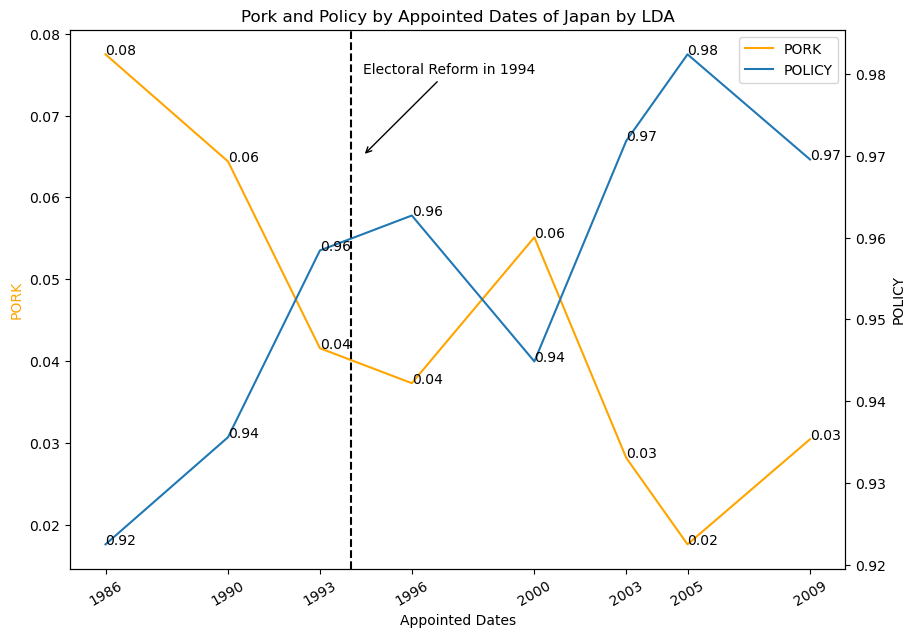

In [50]:
fig, ax1 = plt.subplots(figsize=(10,7))

# 繪製第一個數據集並設定標籤
ratios['PORK'].plot(kind='line', ax=ax1, color='orange', label='PORK')
ax1.set_ylabel('PORK', color='orange')

# 遍歷每一個點
for i, j in zip(ratios.index, ratios['PORK']):
    ax1.annotate(f'{j:.2f}', (i, j))  # 在每一個點上加上數值標記

ax2 = ax1.twinx()

# 繪製第二個數據集並設定標籤
ratios['POLICY'].plot(kind='line', ax=ax2, label='POLICY')
ax2.set_ylabel('POLICY')

# 遍歷每一個點
for i, j in zip(ratios.index, ratios['POLICY']):
    ax2.annotate(f'{j:.2f}', (i, j))  # 在每一個點上加上數值標記

# 設定標題和x軸標籤
ax1.set_title('Pork and Policy by Appointed Dates of Japan by LDA')
ax1.set_xlabel('Appointed Dates')

ax2.axvline(x=1994, color='black', linestyle='--')
ax2.annotate('Electoral Reform in 1994', xy=(1994.4, 0.97), xytext=(1994.4, 0.98),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# 產生新的x軸標籤
new_xticks = [f"{th}" for th in ratios.index]
ax1.set_xticks(ratios.index)
ax1.set_xticklabels(new_xticks, rotation=30)

# 添加兩個圖例到一個圖上
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.savefig('/Users/deankuo/Desktop/python/dissertation_replicate/Pork-Policy_Japan_LDA')


In [64]:
print(ratios[1])

1986    0.077500
1990    0.064403
1993    0.041570
1996    0.037300
2000    0.055140
2003    0.028169
2005    0.017598
2009    0.030451
Name: 1, dtype: float64


In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster      Freq
topic                                                 
8      -7.712279  16.330448       1        1  9.888813
22    -11.180868 -10.936130       2        1  8.325586
32      0.922690  25.917032       3        1  6.410562
54    -10.402506 -16.751211       4        1  5.639047
25     14.369987  15.196568       5        1  5.439432
...          ...        ...     ...      ...       ...
43     18.030514   5.634749      65        1  0.063244
6       5.252076  -7.440624      66        1  0.061197
64    -19.740232   0.702418      67        1  0.060659
27     -0.057433 -19.824614      68        1  0.051274
57     11.837207   2.403384      69        1  0.036739

[69 rows x 5 columns], topic_info=     Term        Freq       Total Category  logprob  loglift
2579   集中  474.000000  474.000000  Default  30.0000  30.0000
1135   就職  484.000000  484.000000  Default  29.0000  29.0000
925    地盤  468.000000  468.000000  Default  28.0000  28.0000
2298   誤る  478.000000  478.000000  Default  27.0000  27.0000
1094   密着  491.000000  491.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
2600  霞ヶ関    0.212680  468.851708  Topic69  -7.6596   0.2108
2290   誕生    0.210839  464.244004  Topic69  -7.6683   0.2120
2590  難しい    0.212246  474.274968  Topic69  -7.6616   0.1973
1003  太陽光    0.211036  466.335219  Topic69  -7.6673   0.2085
1637   権益    0.211266  469.174462  Topic69  -7.6662   0.2035

[2615 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.081026  com
0         2  0.089555  com
0         3  0.072497  com
0         4  0.055439  com
0         5  0.055439  com
...     ...       ...  ...
2648     55  0.002105   黒字
2648     56  0.002105   黒字
2648     57  0.002105   黒字
2648     58  0.002105   黒字
2648     59  0.002105   黒字

[98064 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 23, 33, 55, 26, 54, 46, 29, 60, 53, 62, 49, 3, 31, 8, 12, 50, 6, 15, 20, 16, 1, 52, 41, 36, 5, 10, 64, 40, 48, 47, 66, 56, 32, 63, 37, 43, 39, 30, 69, 24, 57, 11, 2, 45, 38, 68, 59, 61, 14, 4, 51, 25, 17, 67, 42, 21, 22, 19, 18, 13, 27, 35, 34, 44, 7, 65, 28, 58])